<a href="https://colab.research.google.com/github/mouraffa/CIFAR10-Image-Classification-Comparing-CNN-and-ANN-Models/blob/main/CIFAR10_Image_Classification_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Image Classification using Convolutional Neural Network

This notebook demonstrates image classification using the CIFAR10 dataset in TensorFlow. It compares the performance of a simple Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN) for this task. The purpose is to understand why CNNs are preferred over ANNs for image classification.

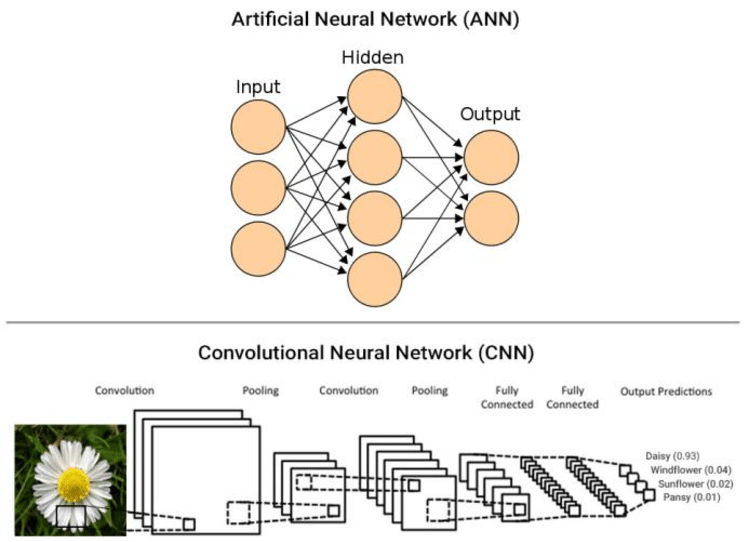

## Dataset

The CIFAR10 dataset consists of 50,000 training images and 10,000 test images. Each image belongs to one of the ten classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

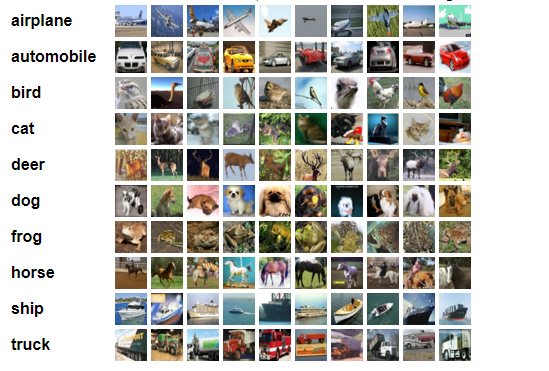

**For example**


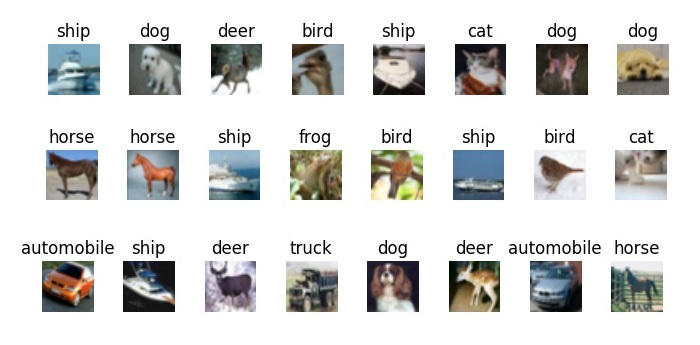

### Load the CIFAR10 dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


### Data Exploration

Let's explore the CIFAR10 dataset to understand its structure and the labels associated with the images.

In [2]:
# Display the shape of the training data
print("Training data shape:", X_train.shape)

# Display the shape of the training labels
print("Training labels shape:", y_train.shape)

# Display the first five training labels
print("Training labels:", y_train[:5])


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Training labels: [[6]
 [9]
 [9]
 [4]
 [1]]


### Data Preprocessing

Before building the models, we need to preprocess the data. This involves normalizing the pixel values to a range of 0 to 1 and reshaping the labels.

In [3]:
# Reshape the training and test labels
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Normalize the training and test images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
classes = ["airplane" , "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

### Data Visualization

Let's visualize a sample image from the dataset to get an idea of the images we will be working with.

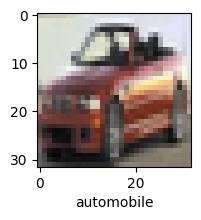

In [34]:
# Function to plot a sample image
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# Plot a random sample image
index = np.random.randint(0, len(y_train))
plot_sample(X_train, y_train, index)

## Artificial Neural Network (ANN)

Let's build a simple Artificial Neural Network (ANN) for image classification and train it using the CIFAR10 dataset.

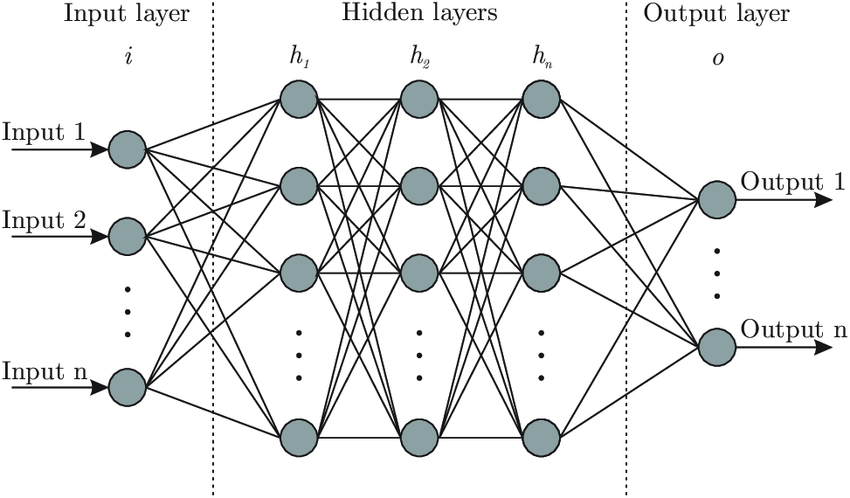

In [9]:
# Building the ANN model
ANN = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

# Compile the ANN
ANN.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN
ANN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 3ms/step - loss: 1.9080 - accuracy: 0.3079
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6679 - accuracy: 0.4014
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5689 - accuracy: 0.4388
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4983 - accuracy: 0.4643
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4415 - accuracy: 0.4854
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3918 - accuracy: 0.5043
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3486 - accuracy: 0.5192
Epoch 8/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3049 - accuracy: 0.5322
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2658 - accuracy: 0.5481
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.22

### Evaluation

Let's evaluate the performance of the ANN on the test set and generate a classification report.

In [10]:
# Evaluate the ANN's performance
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report (ANN):\n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 1s 2ms/step
Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.52      0.59      0.55      1000
           1       0.51      0.77      0.61      1000
           2       0.35      0.44      0.39      1000
           3       0.35      0.43      0.39      1000
           4       0.64      0.17      0.27      1000
           5       0.61      0.23      0.33      1000
           6       0.47      0.68      0.56      1000
           7       0.78      0.41      0.54      1000
           8       0.53      0.73      0.62      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.48     10000
weighted avg       0.53      0.50      0.48     10000



## Convolutional Neural Network (CNN)

Next, let's build a Convolutional Neural Network (CNN) for image classification and train it using the CIFAR10 dataset.

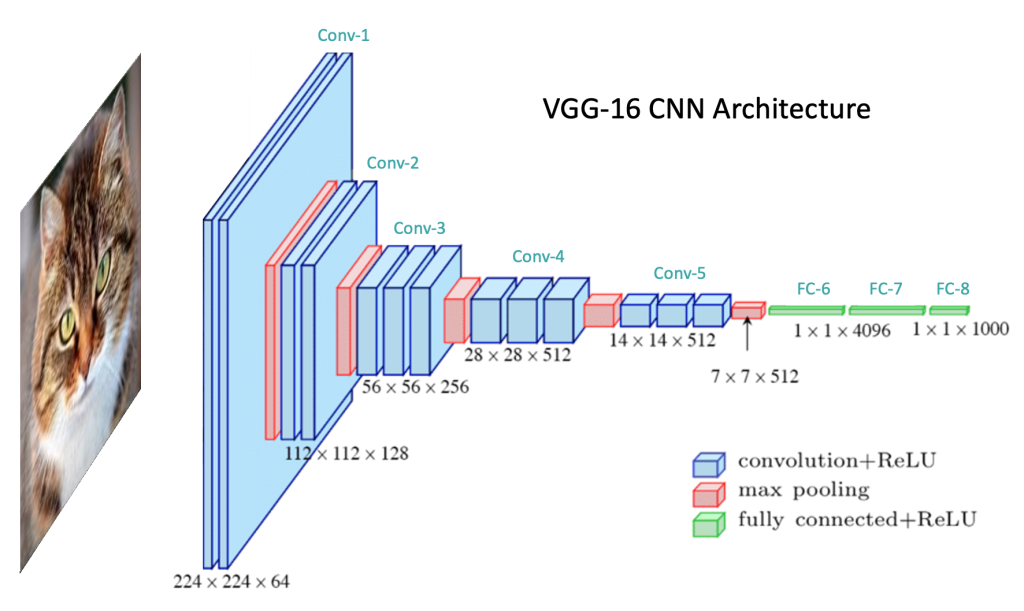

In [11]:
# Building the CNN model
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.3538 - accuracy: 0.5125
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9477 - accuracy: 0.6691
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7338 - accuracy: 0.7416
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5426 - accuracy: 0.8080
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3743 - accuracy: 0.8679
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9106
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1846 - accuracy: 0.9365
Epoch 8/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1452 - accuracy: 0.9492
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1196 - accuracy: 0.9583
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.11

### Evaluation

Let's evaluate the performance of the CNN on the test set and calculate the accuracy.

In [12]:
# Evaluate the CNN's performance
CNN.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.8278 - accuracy: 0.6830


[1.8277636766433716, 0.6830000281333923]

### Prediction

Let's make predictions using the CNN model on the test set and display a sample image along with its predicted and true classes.

313/313 [==============================] - 1s 2ms/step


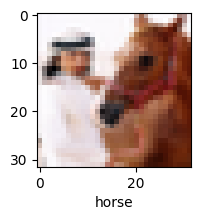

In [13]:
# Predict classes for test images using the CNN
y_pred = CNN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Display the predicted classes, true classes, and a random test image
y_test_classes = y_test.reshape(-1,)
index = np.random.randint(0, len(y_test))
plot_sample(X_test, y_test_classes, index)

## Model Comparison

Finally, let's compare the performance of the ANN and CNN models and analyze the results.

### Performance Comparison

Let's compare the accuracy and other performance metrics of the ANN and CNN models.

In [14]:
# Get predictions for the ANN model
y_pred_ann = ANN.predict(X_test)
y_pred_classes_ann = [np.argmax(element) for element in y_pred_ann]

# Get predictions for the CNN model
y_pred_cnn = CNN.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

# Calculate accuracy for the ANN model
accuracy_ann = np.sum(y_pred_classes_ann == y_test_classes) / len(y_test_classes)

# Calculate accuracy for the CNN model
accuracy_cnn = np.sum(y_pred_classes_cnn == y_test_classes) / len(y_test_classes)

# Print the accuracy
print("Accuracy (ANN):", accuracy_ann)
print("Accuracy (CNN):", accuracy_cnn)


313/313 [==============================] - 1s 2ms/step
Accuracy (ANN): 0.4958
Accuracy (CNN): 0.683


### Conclusion

The comparison of the ANN and CNN models for image classification on the CIFAR10 dataset reveals that the CNN model achieves higher accuracy compared to the ANN model. This is because the CNN model utilizes convolutional layers that can capture spatial patterns in images, enabling it to learn more complex features and improve classification performance. The ANN model, on the other hand, treats the image as a flattened input, losing the spatial information present in the images.

In this case, the CNN model achieved an accuracy of 68.3% while the ANN model achieved an accuracy of 49.58%. The CNN model outperforms the ANN model in terms of accuracy, which demonstrates the effectiveness of CNNs for image classification tasks.